In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import glob
import os
import pandas as pd
from utils.data import *
from utils.evaluation import *

df = pd.read_csv("ntu-fintech-hw1-new/train.csv", index_col=["index"])
df.head(1)

,age,euducation_level,job,marital,have_credit_card,have_housing_loan,have_personal_loan,connect_method,previous_connect_month,previous_connect_weekday,campaign_connect_times,after_campaign_connect_day,before_campaign_connect_times,last_campaign_outcomes,employment_rate,consumer_price_index,consumer_confidence_index,label
index,,,,,,,,,,,,,,,,,,
0,39.0,high,employment,married,no,no,no,cellular,November,Tuesday,1.0,-1.0,0.0,nonexistent,59.9,93.2,-42.0,0


In [4]:
# preprocessing
## NaN
#df = df.dropna(axis=0)
df = fill_nan_with_mean_most(df)
## label
#df = labeling(df)
for feature in df.columns:
    df[feature] = labelencoder.fit_transform(df[feature])


#df =  preprocessing_only_label(df)
#X =  preprocessing_onehot(X)
#df =  preprocessing_mean_mode(df)

X = df.drop(['label'],axis=1)
y = df['label']
print(X.shape, y.shape)
X.head(1)

(20000, 17) (20000,)


,age,euducation_level,job,marital,have_credit_card,have_housing_loan,have_personal_loan,connect_method,previous_connect_month,previous_connect_weekday,campaign_connect_times,after_campaign_connect_day,before_campaign_connect_times,last_campaign_outcomes,employment_rate,consumer_price_index,consumer_confidence_index
index,,,,,,,,,,,,,,,,,
0,21,0,0,1,0,0,0,0,7,3,0,0,0,1,7,11,7


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train.head(1)

(16000, 17) (4000, 17) (16000,) (4000,)


,age,euducation_level,job,marital,have_credit_card,have_housing_loan,have_personal_loan,connect_method,previous_connect_month,previous_connect_weekday,campaign_connect_times,after_campaign_connect_day,before_campaign_connect_times,last_campaign_outcomes,employment_rate,consumer_price_index,consumer_confidence_index
index,,,,,,,,,,,,,,,,,
11873,9,0,0,2,0,2,0,0,1,4,1,0,0,1,2,0,22


In [6]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


In [7]:
X_train = X
y_train=y

In [1]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from datetime import datetime
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, Lasso
params ={'LGBMClassifier__num_leaves': sp_randint(6, 50), 
             'LGBMClassifier__min_child_samples': sp_randint(100, 500), 
             'LGBMClassifier__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'LGBMClassifier__subsample': sp_uniform(loc=0.2, scale=0.9), 
             'LGBMClassifier__colsample_bytree': sp_uniform(loc=0.5, scale=0.6),
             'LGBMClassifier__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'LGBMClassifier__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}
"""params = {
        'XGBClassifier__min_child_weight': [0.05, 0.1, 0.5, 1, 10],
        'XGBClassifier__gamma': [0.01, 0.25, 0.5, 1, 1.25, 1.5, 2,3],
        'XGBClassifier__subsample': [0.5, 0.6, 0.75, 0.8],
        'XGBClassifier__colsample_bytree': [0.7,0.8, 0.9,1.0],
        'XGBClassifier__max_depth': [2, 3, 4, 5, 6, 7,8],
        'XGBClassifier__early_stopping_rounds':[10,15,20, 30],
        'XGBClassifier__eta':[2,1.5, 1,0.75,0.5,0.25, 0.01],
        'XGBClassifier__n_estimators':[250, 300,350, 375, 400, 450]
        }"""
"""params = {'SVC__kernel':['rbf'],
              'SVC__C':[1,100,10e5], 
              'SVC__gamma':[0.1,0.01],
             'SVC__probability':[True],
             }"""
"""params = { 
    'RandomForestClassifier__n_estimators': [100, 200,300, 500],
    'RandomForestClassifier__max_features': ['auto', 'sqrt', 'log2'],
    'RandomForestClassifier__max_depth' : [4,5,6,7,8, 9, 10],
    'RandomForestClassifier__criterion' :['gini', 'entropy']
}"""
"""params = {'boosting_type': 'gbdt', 'max_depth': -1, 'objective': 'binary', 
          'num_leaves': 64, 'learning_rate': 0.05, 'max_bin': 512, 
          'subsample_for_bin': 200, 'subsample': 1, 'subsample_freq': 1,
          'colsample_bytree': 0.8, 'reg_alpha': 5, 'reg_lambda': 10, 
          'min_split_gain': 0.5, 'min_child_weight': 1, 
          'min_child_samples': 5, 'scale_pos_weight': 1, 'num_class': 1, 
          'metric': 'binary_error'}"""
"""params={}"""
pipe = Pipeline(steps=[
                        #('pca', PCA()),
                        #('KMeans', KMeans()),
                        #('sampling', SMOTE()),
                        ('sampling', RandomUnderSampler()),
                        ('scaler', StandardScaler()),
                        #('feature_selection', SelectFromModel(LinearSVC())),
                        #('XGBClassifier', XGBClassifier())
                        #('SVC', SVC()),
                        #('RandomForestClassifier', RandomForestClassifier()),
                        #('LogisticRegression', LogisticRegression()),
                        ('LGBMClassifier', LGBMClassifier()),
                        ])
                        


folds = 3
param_comb = 50

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(pipe, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

NameError: name 'X_train' is not defined

In [9]:
random_search.best_params_

{}

In [10]:
model = random_search.best_estimator_
y_pred = model.predict(X_test)
score = myScore(y_pred, y_test.to_numpy())
score

0.7498861566484517

myScore: 0.7498861566484517
[[2780  622]
 [ 175  423]]
0.7622621161268504


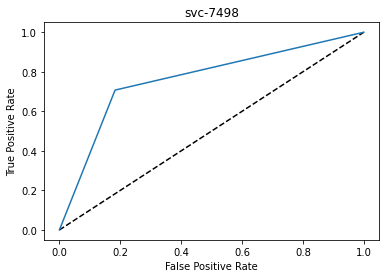

In [11]:
from joblib import dump, load
import json
score = myScore(y_pred, y_test.to_numpy())
print("myScore:", score)

cm ,report, cv_score, roc = result(model, X_test, y_test, y_pred)
save = {}
save["myScore"] = score
save["cm"] = str(cm)
save["report"] = report
save["cv_score"] = cv_score
save["roc"] = roc

print(cm)
print(roc)
filename = ""
dump(model, "output/models/"+filename+".joblib") 
with open("log/"+filename+'.json', 'w') as fp:
    json.dump(save, fp)
plt.title(filename)
plt.savefig("log/img/"+filename+'.png')

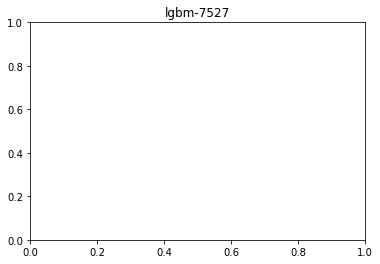

In [117]:
model1 = load("output/models/lgbm-7747.joblib")
model2 = load("output/models/rf-7357.joblib")


In [118]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
models = [("m1", model1),("m2", model2)]
clf2 = VotingClassifier(estimators = models, voting='soft') 
clf2.fit(X_train, y_train)

VotingClassifier(estimators=[('m1',
                              Pipeline(steps=[('sampling',
                                               RandomUnderSampler()),
                                              ('scaler', StandardScaler()),
                                              ('LGBMClassifier',
                                               LGBMClassifier(colsample_bytree=0.8911072339216042,
                                                              min_child_samples=197,
                                                              min_child_weight=10.0,
                                                              num_leaves=41,
                                                              reg_alpha=0.1,
                                                              reg_lambda=0,
                                                              subsample=0.40688973304147463))])),
                             ('m2',
                              Pipeline(steps=[('sampling',
  

In [119]:
model = clf2
y_pred = model.predict(X_test)
score = myScore(y_pred, y_test.to_numpy())
score

0.7676678445229682

myScore: 0.7676678445229682


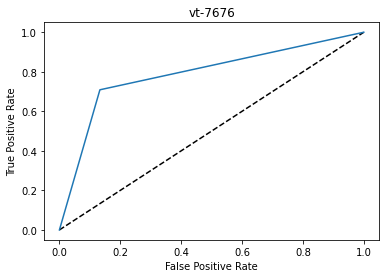

In [120]:
from joblib import dump, load
import json
score = myScore(y_pred, y_test.to_numpy())
print("myScore:", score)

cm ,report, cv_score = result(model, X_test, y_test, y_pred)
save = {}
save["myScore"] = score
save["cm"] = str(cm)
save["report"] = report
save["cv_score"] = cv_score


filename = "vt-7676"
dump(model, "output/models/"+filename+".joblib") 
with open("log/"+filename+'.json', 'w') as fp:
    json.dump(save, fp)
plt.title(filename)
plt.savefig("log/img/"+filename+'.png')

In [110]:
from sklearn.ensemble import BaggingClassifier
logbagClf = BaggingClassifier(LogisticRegression(random_state=0, solver='lbfgs'), n_estimators = 100, oob_score = True, random_state = 90)
logbagClf.fit(X_train, y_train)


BaggingClassifier(base_estimator=LogisticRegression(random_state=0),
                  n_estimators=100, oob_score=True, random_state=90)

In [111]:
model = logbagClf
y_pred = model.predict(X_test)
score = myScore(y_pred, y_test.to_numpy())
score

0.4871908127208481